# **Linear regression**

Notebook dedicated to learn deeply what is a linear regression, explain it fully, the assuptions and the code needed to create a linear regression from scratch, as well as from Python libraries.

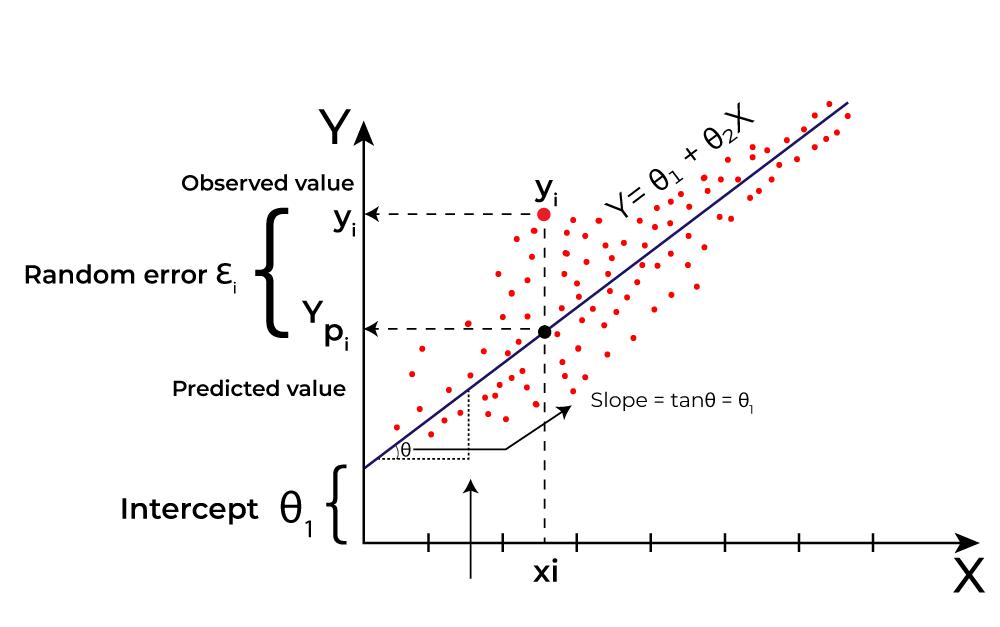

## **What is a linear regression?**
Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.


**Why linear regression is important?**
- It´s easy to understand and interpret, making it a great starting point.
- Helps to predict future outcomes based on past data.
- Many algorithms, like the logistic regression or neural networks are build on the concepts of the linear regression.
- It´s computationally efficient.
- It provides insights into relationships between variables.


$$ \text{Model equation:}$$
$$\widehat{Y} = \beta_{0} + \beta_{1}X + \varepsilon$$


Where,
1. $\widehat{Y}$ is the predicted value
2. $\beta_0$ is the intercept
3. $\beta_1$ is the slope
4. $\varepsilon$ is the error

The main objective is to find the values of the intercept and the slope to minimize the error. Finding a prediction line as close as possible to the real values of Y.


To quantify the total error of the line, we use the cost function (loss function). In linear regression the most common one is the **Sum of squared errors:**

$$SSE = \sum_{i = 1}^{n}(Y_i - \widehat{Y_i})^{2}$$

$$SSE(\beta_0, \beta_1) = \sum_{i = 1}^{n}(Yi - (\beta_0 + \beta_1X_i))^{2}$$

## **Building the linear regression**
To build the linear regression from scratch, the necessary libraries are:

In [2]:
## Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Defining the data

np.random.seed(42) # ensuring replicability
n = 1000 # define the number of observations

x = np.linspace(0, 10, n) # independent variable
y = 2 * x + 1 + np.random.normal(0, 1.5, n) # dependent variable

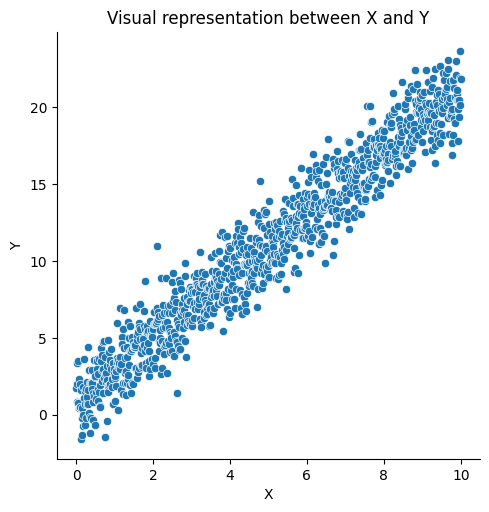

In [4]:
# Plotting the data
sns.relplot(x = x, y = y, kind = 'scatter')
plt.title('Visual representation between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### **Finding the intercept and the slope**

Once the data has been defined, we need to find the values of $\beta_{1}$ and $\beta_{0}$

$$\beta_{1} = \frac{\sum_{i = 1}^{n}(X_i - \overline{X})(Y_i - \overline{Y})}{\sum_{i = 1}^{n}(X_i - \overline{X})^{2}}$$





$$\beta_0 = \overline{Y}-\beta_1\overline{X}$$

Where $\overline{X}$ and $\overline{Y}$ are the mean for the dependent and the independent variables corresponding.

The reason as to why the coefficients $\beta_1$ and $\beta_0$ are calculated like this is because of the partial derivatives of the Sum of squared errors (SSE).

To find the minimum value of a function we have to calculate the derivative equal to zero

$$\frac{\partial \text{SSE}}{\partial \beta_0} = 0$$

$$\frac{\partial \text{SSE}}{\partial \beta_1} = 0$$

This provides a equation system that, when completed, provides the exact equations for each coefficient in the linear regression.

---

An important notion of the $\beta_1$ coefficient is the fact that is the quotient between the covariance of X and Y divided by the variance of X. ***The slope tells us for each unit of dispersion in X (variance). How much dispersion there is with Y (covariance)?***

$$\beta_1 \propto \frac{\text{Covariance}(X, Y)}{\text{Variance}(X)}$$

In [5]:
# Findint the mean of the variables
x_bar = x.mean()
y_bar = y.mean()

In [6]:
# Calculating the coefficients of the regression

covariance_xy = np.sum((x - x_bar) * (y - y_bar))
variance_x = np.sum((x - x_bar) ** 2)

beta_1 = covariance_xy / variance_x
beta_0 = y_bar - (beta_1 * x_bar)

### **Coefficients and the interpretation**

In [7]:
# Coefficients
print(f"The intercept is: {beta_0}")
print(f"The slope is: {beta_1}")

The intercept is: 0.938860099764387
The slope is: 2.0180275967938206


- Intercept ($\beta_0$): $0.9388...$
- Slope ($\beta_1$): $2.0188...$

the slope represents the rate of change of the dependent variable. Meaning, for each unit of increment of the independent variable, the dependent variable will increase/decrease the amount of the slope.

To know whether the dependent variable increases or decreases, you take a look at the sign. A positive slope means the relationship between the variables is direct: When X increases, Y increases. On the other hand, if the sign is negative that means the relationship is inverse: When X increase, Y decrease.

The intercept is the base value, it represents the value corresponding when the independent variable is zero. It only has an interpretation depending on the context of the data and if it makes sense with them.

### **Evaluation of the model**

The first step to evaluate any metric is to predict each X point with the intercept and slope coefficients:

In [8]:
def prediction (x, beta_0, beta_1):
  return beta_0 + beta_1 * x

y_hat = prediction(x, beta_0=beta_0, beta_1=beta_1)

In [9]:
print(f"The first 5 predicted values are: {y_hat[:5]}")

The first 5 predicted values are: [0.9388601  0.95906058 0.97926105 0.99946153 1.01966201]


Then, we calculate the **Mean Squared Error (MSE)**. The formula square the distance between the real value and the predicted value, penalizing heavily the high errors like so and avoiding any negative value. If the MSE is a small value, it means the model fits well the data.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

In [10]:
MSE = (1/n) * np.sum((y-y_hat)**2)

print(f"The Mean Squared Error is: {MSE}")

The Mean Squared Error is: 2.15257251951848


$MSE = 2.15257......$
When the errors are squared this metric penalize the error of high magnitude and eliminates the negative values. This metric evaluated the squared mean difference between the predicted value and the real value of $Y$

In [11]:
RMSE = np.sqrt(MSE) 

print(f"The Root Mean Squared Error is: {RMSE}")

The Root Mean Squared Error is: 1.4671647894897424


$$\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{2.1526} \approx \mathbf{1.467}$$

When the squared root of the MSE is calculated, it gives the mean of the error in the model. Meaning, on average the model makes an error of 1.467 units in $Y$. This metric is easy to understand and share to stakeholders rather than the MSE which is squared

Other metric is the determination coefficient ($R^2$), which is the most important measure. It answers the question of **what proportion of the variance in Y can be explained by the model?**

$$R^2 = 1 - \frac{\text{Variance not explained (SSE)}}{\text{Total variance (SST)}}$$


Its important to notice the components of $R^2$:

**Sum of Squared Errors:** Squared difference of the real value and the predicted value
$$\text{SSE} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

**Sum of the total squares:** Squared difference of the real value and the mean of the data
$$\text{SST} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2$$

**Determination coefficient:**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}$$

Where:
- $R^2$ is always between 0 and 1
- $R^2$ near to 1 means that it fits well
- $R^2$ near to 0 means that the model doesn´t explain the variance of the data. The predicted line is no better than to calculate the mean of Y.

In [12]:
SSE = np.sum((y-y_hat)**2)
SST = np.sum((y-y_bar)**2)

r_squared = 1 - (SSE / SST)

print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.940466737067186


**$R^2: 0.940466....$**

Interpretation: the model explains about 94% of the variance of the target variable $Y$ through the linear relationship with the independent variable $X$. Meaning the model has a high quality of prediction

### **Conclusion of the model**

The model has a high quality of prediction of the target variable $Y$. The linear relationship between $X$ and $Y$ explains most of the variance, and in average, the model makes an error of 1.46 of units. Depending on the context of the data this could mean a low error.

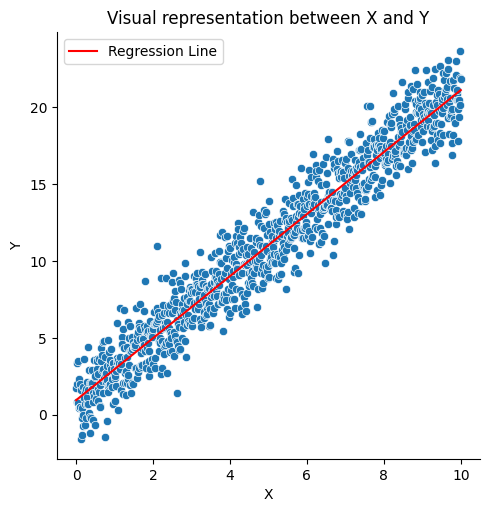

In [13]:
# Plotting the data
sns.relplot(x = x, y = y, kind = 'scatter')
plt.title('Visual representation between X and Y')
plt.xlabel('X')
plt.ylabel('Y')

# Plotting the regression line
plt.plot(x, y_hat, color='red', label='Regression Line')
plt.legend()
plt.show()

## **Model assumptions**

The correctness of the model depends on several underlying assumptions. Understanding them helps to ensure replicable predictions, meaningful relationships and trustworthy inferences. The assumptions are:

1. **Linearity:** The relationship of the independent and dependent variables is linear.

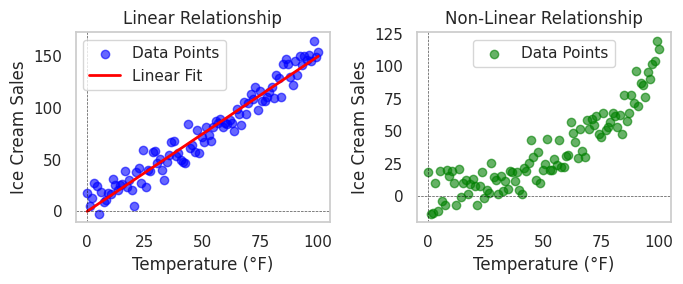

2. **Homoscedasticity:** The variance of residuals remains constant across all levels of independent variables, residuals should appear evenly scattered and not with a pattern.

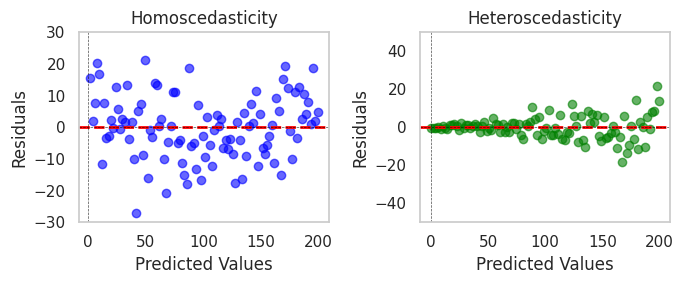

3. **Multivariate normality:** Residuals should follow a normal distribution when multiple predictors are involved. Normality supports valid confidence intervals, hypothsis tests and p-values.

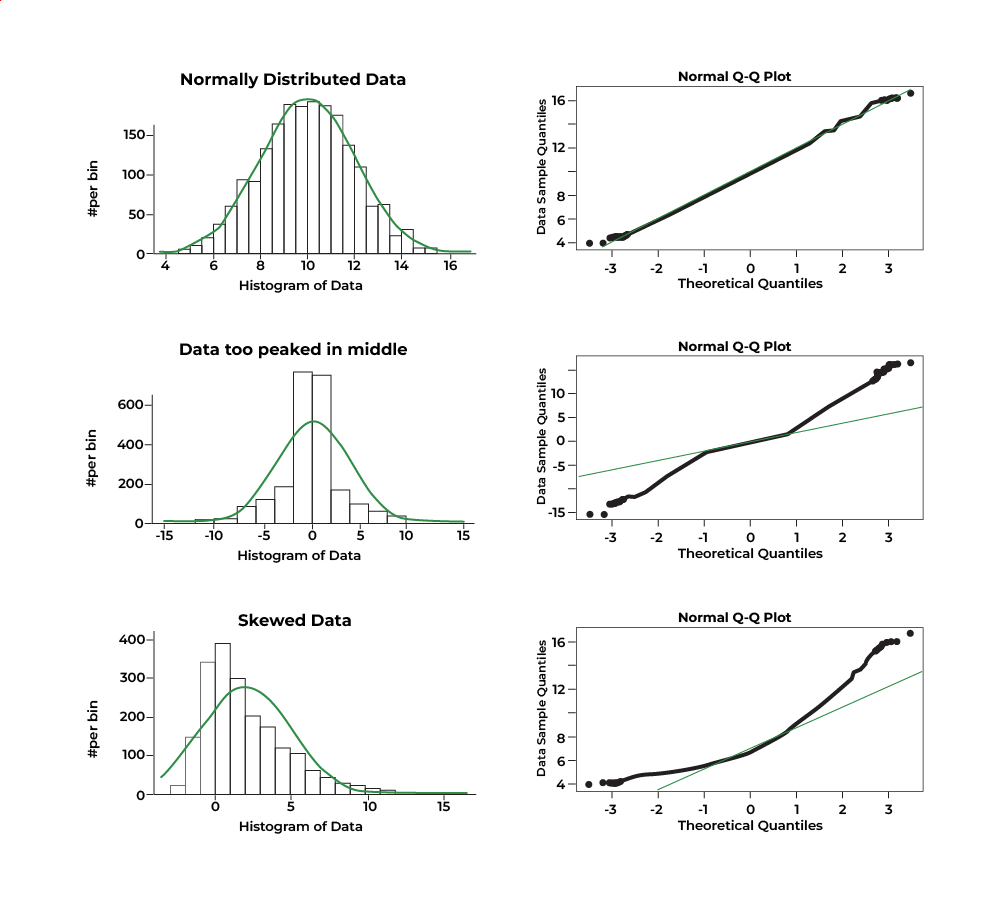

4. **Independence of errors:** Residuals must nos correlate with each others accross observations, correlated errors suggest the mothel missed temporal or patterned structured. Also, the autocorrelation can inflate the significance and mislead conclusions.

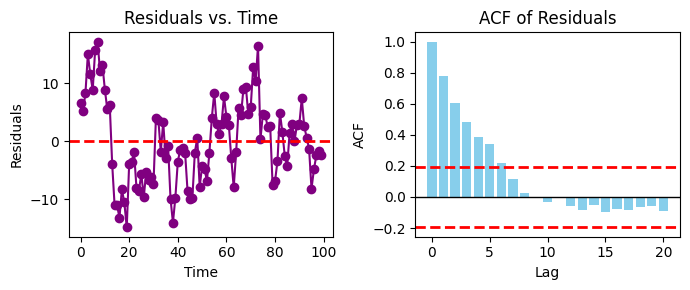

5. **Lack of multicollinearity:** Independent variables must not correlate with each other, it becomes difficult to assess the true contribution of each predictor.

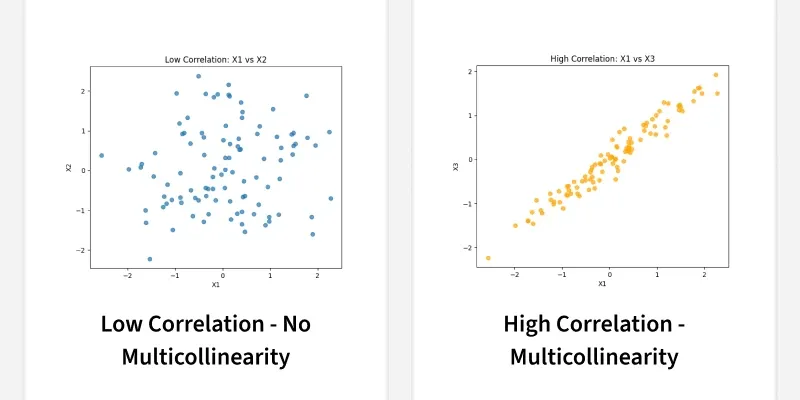

6. **Absence of endogeneity:** Independent variables in the regression model should not be correlated with the error. The endogeneity causes biased and inconsistent parameter estimates.

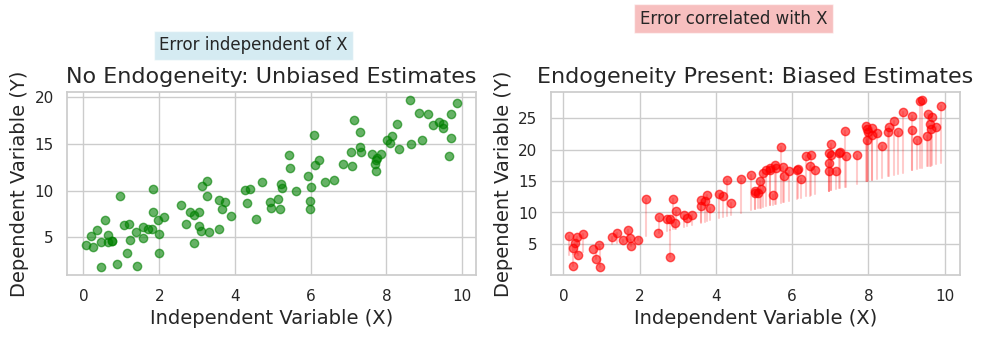

### Detecting Violations of Assumptions
Here are some common techniques to detect violations:

1. Residual Plots: Plotting residuals against fitted values helps inspect linearity, constant variance and independence. A random scatter with no visible pattern indicates the assumptions are likely satisfied.
2. Q-Q Plots: A Quantile-Quantile plot can be used to assess the normality of residuals. If the residuals follow a straight line in a Q-Q plot, they are normally distributed.
3. Variance Inflation Factor (VIF): To check for multicollinearity, calculate the VIF for each independent variable. A VIF value greater than 5 or 10 indicates significant multicollinearity.
4. Durbin-Watson Test: Detects autocorrelation in residuals. A value near 2 means no autocorrelation, while values far below or above 2 indicate positive or negative correlation.
5. Statistical Tests: Perform statistical tests like the Breusch-Pagan test for homoscedasticity and the Shapiro-Wilk test for normality.

### **Testing the assumptions**

In [ ]:
# Calculating the error vector
error = y - y_hat

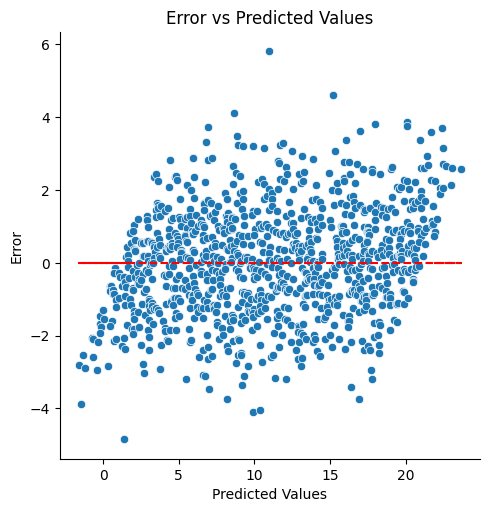

In [27]:
# Testing linearity assumption
sns.relplot(x = y, y = error, kind = 'scatter')
plt.plot(y, np.zeros_like(x), color='red', linestyle='--')
plt.title('Error vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Error')
plt.show()

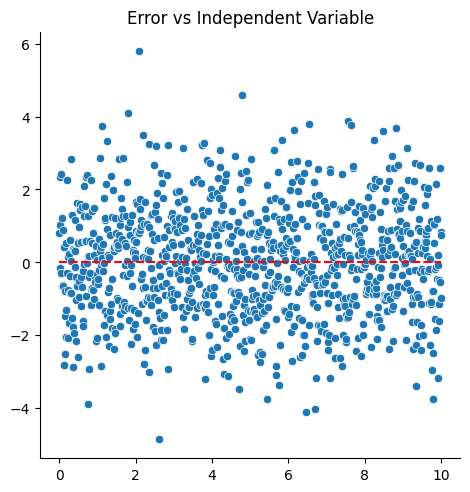

In [22]:
# Plotting the error independence
sns.relplot(x = x, y = error, kind = 'scatter')
plt.plot(x, np.zeros_like(x), color='red', linestyle='--')
plt.title('Error vs Independent Variable')
plt.show()

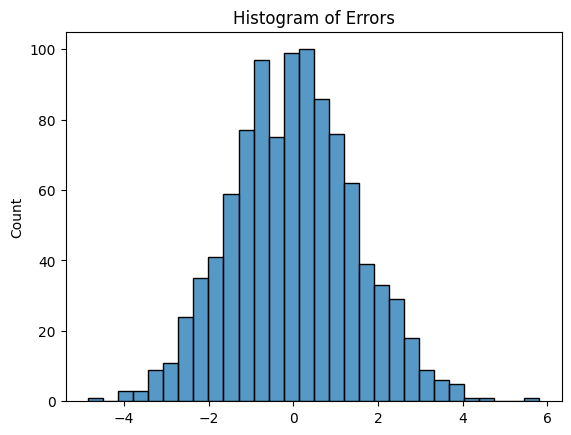

In [31]:
# Testing normality of the errors
sns.histplot(error, bins=30)
plt.title('Histogram of Errors')
plt.show()

This are just visual tests for simplicity, as mentioned before there are formal ways to test the assumptions on the model. However, this plots are a great representation of the assumptions of the model and how they are met, meaning, the model is accurate and applicable for the data context, it doesn´t mislead the conclusions drawn before, and the regression is a great representation of the data.

Note: Not all assumptions mentioned were tested since there is only one independent variable. In the scenario were there are multiple predictors more test have to be made.

## **Linear regression with Scikit-learn**

In [34]:
# Import scikit-learn for validation
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = x.reshape(-1, 1)  # Reshaping for sklearn
model.fit(X, y)
y_pred_sklearn = model.predict(X)

In [35]:
# printing the coefficients from sklearn
print(f"Sklearn Intercept: {model.intercept_}")
print(f"Sklearn Slope: {model.coef_[0]}")

Sklearn Intercept: 0.9388600997643834
Sklearn Slope: 2.018027596793821


In [36]:
# Evaluating sklearn predictions
MSE_sklearn = (1/n) * np.sum((y - y_pred_sklearn) ** 2)
RMSE_sklearn = np.sqrt(MSE_sklearn)
print(f"Sklearn MSE: {MSE_sklearn}")
print(f"Sklearn RMSE: {RMSE_sklearn}")

Sklearn MSE: 2.1525725195184804
Sklearn RMSE: 1.4671647894897424


In [37]:
# R-squared for sklearn
SSE_sklearn = np.sum((y - y_pred_sklearn) ** 2)
r_squared_sklearn = 1 - (SSE_sklearn / SST)
print(f"Sklearn R-squared: {r_squared_sklearn}")

Sklearn R-squared: 0.940466737067186
